In [1]:
import pandas as pd
import pylab as plt
import os
from glob import glob
%matplotlib inline

In [2]:
with open('pipeline_data/steps.dat', 'r') as handle:
    steps = handle.readline().strip().split()
     
gnd_fname = glob('pipeline_data/data_????-??-??.csv')[0]
df_gnd = pd.read_csv(gnd_fname, dtype={'fips': str}).set_index('fips')

In [16]:
data = {}
for i in range(len(steps)):
    gnd = df_gnd[f'case{i}'].sum()
    gnd_date = steps[i]
    
    if gnd_date in data:
        data[gnd_date]['gnd'] = gnd
    else:
        data[gnd_date] = {'gnd': gnd}
    
    prd_fname = f'results_time/{steps[i]}_case.csv'
    if os.path.isfile(prd_fname):
        df_forecast = pd.read_csv(prd_fname)
        df_forecast_nation = df_forecast[df_forecast.location=='US']
        target_end_dates = df_forecast_nation['target_end_date'].unique()


        for d in target_end_dates:
            tmp = df_forecast_nation[df_forecast_nation.target_end_date == d]
            horizon = int(tmp['target'].values[0].split(' ')[0])

            point = tmp[tmp['type'] == 'point']['value'].values[0]
            q10 = tmp[tmp['quantile'] == .1]['value'].values[0]
            q90 = tmp[tmp['quantile'] == .9]['value'].values[0]

            if d in data:
                data[d][f'prd_{horizon}'] = point
                data[d][f'prd_{horizon}_q10'] = q10
                data[d][f'prd_{horizon}_q90'] = q90
            else:
                data[d] = {
                    f'prd_{horizon}': point,
                    f'prd_{horizon}_q10': q10,
                    f'prd_{horizon}_q90': q90
                }

In [ ]:
df_c

/usr/local/lib64/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

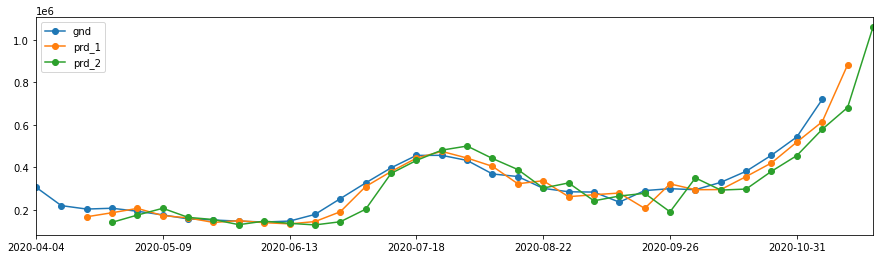

In [22]:
df_case = pd.DataFrame(data=data).T
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_case[['gnd', 'prd_1', 'prd_2']].plot(ax=ax, marker='o')
df_case[['gnd', 'prd_1', 'prd_2']].to_csv('results_time/time_plot_case.csv', )

In [36]:
data = {}
for i in range(len(steps)):
    gnd = df_gnd[f'death{i}'].sum()
    gnd_date = steps[i]
    
    if gnd_date in data:
        data[gnd_date]['gnd'] = gnd
    else:
        data[gnd_date] = {'gnd': gnd}
    
    prd_fname = f'results_time/{steps[i]}_death.csv'
    if os.path.isfile(prd_fname):
        df_forecast = pd.read_csv(prd_fname)
        df_forecast_nation = df_forecast[df_forecast.location=='US']
        target_end_dates = df_forecast_nation['target_end_date'].unique()


        for d in target_end_dates:
            tmp = df_forecast_nation[df_forecast_nation.target_end_date == d]
            horizon = int(tmp['target'].values[0].split(' ')[0])

            point = tmp[tmp['type'] == 'point']['value'].values[0]
            q10 = tmp[tmp['quantile'] == .1]['value'].values[0]
            q90 = tmp[tmp['quantile'] == .9]['value'].values[0]

            if d in data:
                data[d][f'prd_{horizon}'] = point
                data[d][f'prd_{horizon}_q10'] = q10
                data[d][f'prd_{horizon}_q90'] = q90
            else:
                data[d] = {
                    f'prd_{horizon}': point,
                    f'prd_{horizon}_q10': q10,
                    f'prd_{horizon}_q90': q90
                }

/usr/local/lib64/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

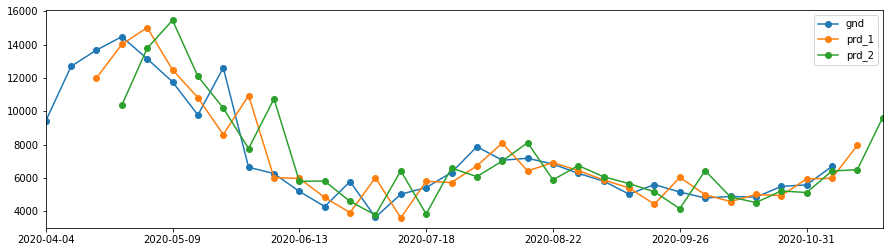

In [37]:
df_death = pd.DataFrame(data=data).T
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_death[['gnd', 'prd_1', 'prd_2']].plot(ax=ax, marker='o')